# Motion of 2-body system under MOND

In [ ]:
from sympy import symbols, Function, diff, Matrix
#from astropy.constants import G

t = symbols('t')
m1, m2 = symbols('m1 m2')
G = symbols('G')
a0 = symbols('a0') 
q1 = symbols('q1')
q2 = symbols('q2')

r12 = Function('r12')(t)  # Can be made a vector if desired
F12 = Function('F12')(t)
K = Function('K')(t)
y = Function('y')(t)
Q = Function('Q')(t)
#Q = 2*(1-q1**1.5-q2**1.5)/(3*q1*q2)
y = (G*(m1+m2)/a0)/(r12*Q*a0)**2
F12 = G*m1*m2 / r12**2*(1+y**(-1/2))

# Construct the right-hand side of the equation
rhs = K * r12 - ((m1 + m2) / m1) * (F12 / m2)

# Left-hand side: second time derivative of r12
lhs = diff(r12, t, 2)

# Display the symbolic equation
from sympy import Eq, pprint
eq = Eq(lhs, rhs)
display(eq)


ModuleNotFoundError: No module named 'sympy'

# solve for scale factor a(t)

/var/folders/p_/547j2lgx16v73ndqdj0rb9t00000gn/T/ipykernel_46817/532617644.py:9: RuntimeWarning: invalid value encountered in sqrt
  return H0 * a * np.sqrt(om_lambda + om_m * a**(-3)) # t in Myr
/var/folders/p_/547j2lgx16v73ndqdj0rb9t00000gn/T/ipykernel_46817/532617644.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


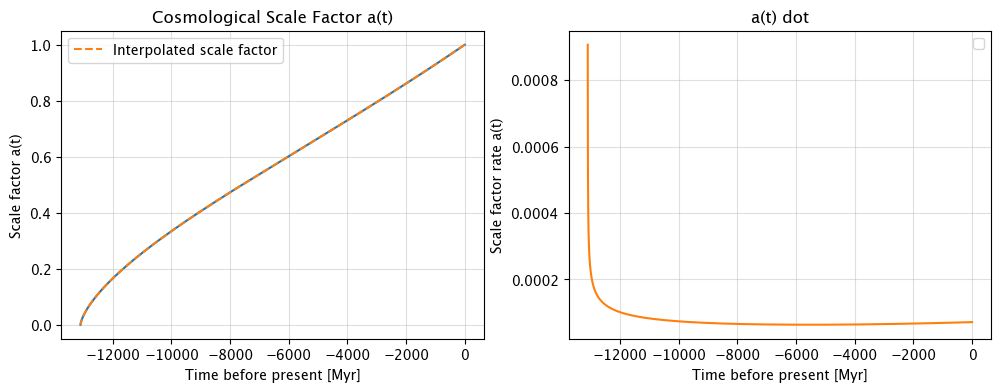

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

def adot(t, a, om_m=1/3):
    H0 = 1/14e3  # in Myr^-1
    om_lambda = 1 - om_m
    return H0 * a * np.sqrt(om_lambda + om_m * a**(-3)) # t in Myr

t_start = 0.
t_end = -14e3  # integrate forward in time, but with negative derivative
y0 = [1.0]  # present-day scale factor

t_eval = np.linspace(t_start, t_end, 10000)
sol_a = solve_ivp(adot, [t_start, t_end], y0, t_eval=t_eval)

# We want a(t) defined from t = -14Gyr to 0, so reverse:
scalefac = PchipInterpolator(sol_a.t[::-1], sol_a.y[0][::-1])  # now callable with t in [-14e9, 0]

# Plotting a(t) and a(t) dot
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(sol_a.t, sol_a.y[0])  # negate time to show past
ax[0].plot(sol_a.t, scalefac(sol_a.t), linestyle='--', label='Interpolated scale factor')
ax[0].set_xlabel("Time before present [Myr]")
ax[0].set_ylabel("Scale factor a(t)")
ax[0].set_title("Cosmological Scale Factor a(t)")
ax[0].grid(True, alpha=0.4)
ax[0].legend()
ax[1].plot(sol_a.t, scalefac.derivative()(sol_a.t), color='tab:orange',)
ax[1].set_xlabel("Time before present [Myr]")
ax[1].set_ylabel("Scale factor rate a(t)")
ax[1].set_title("a(t) dot")
ax[1].grid(True, alpha=0.4)
ax[1].legend()
plt.show()

## Check with Cosmology 

Age of Universe today: 13.072820934795681 Gyr


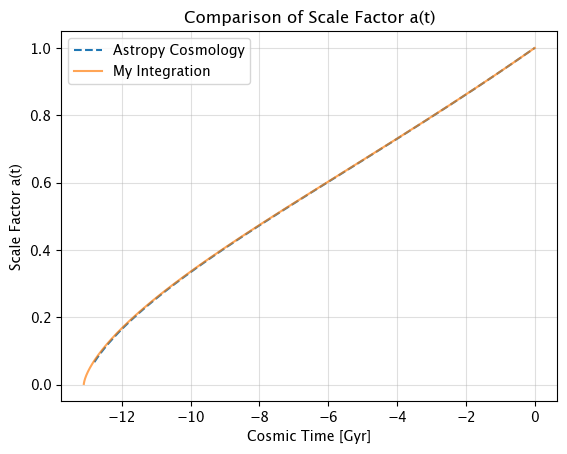

In [3]:
from astropy.cosmology import Flatw0waCDM
import astropy.units as u

H0 = 70 # km/s/Mpc
Om_m = 1/3
T_cmb = 0
N_eff = 0
w0 = -1
wa = 0

cosmo = Flatw0waCDM(
        H0=H0,
        Om0=Om_m,
        Tcmb0=T_cmb,
        Neff=N_eff,
        w0=w0,
        wa=wa,
    )
z0 = 0 # current epoch
z_start = 14  # starting redshift
nsamples = 1000
z_grid = np.linspace(z_start, z0, nsamples)
a_grid = 1.0 / (1.0 + z_grid)

t0 = cosmo.age(0).to(u.Gyr).value  # Age of Universe today (Gyr) in my cosmology
print(f"Age of Universe today: {t0} Gyr")
# Cosmic time from Astropy (Gyr)
t_Gyr = cosmo.age(z_grid).to(u.Gyr).value

plt.plot(t_Gyr-t0, a_grid, label='Astropy Cosmology', linestyle='--')
plt.plot(sol_a.t/1e3, scalefac(sol_a.t), label='My Integration', alpha=0.7)
plt.xlabel("Cosmic Time [Gyr]")
plt.ylabel("Scale Factor a(t)")
plt.title("Comparison of Scale Factor a(t)")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

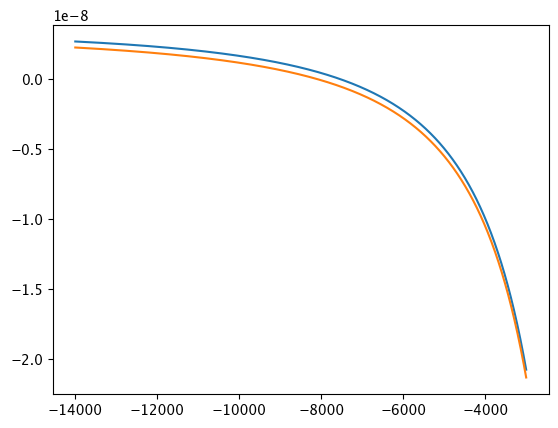

In [9]:
t = np.linspace(-14e3, -3e3, 1000)
plt.plot(t, K_true(t))
plt.plot(t, K(t))

# Sub into Eq.(2) in Zhao 2013

softening scale b that mimics the PySCo: 161.09666711793437 kpc
Minimum separation in the past: 29.64 kpc at time -7.08 Gyr ago
flyby in the future: 29.76


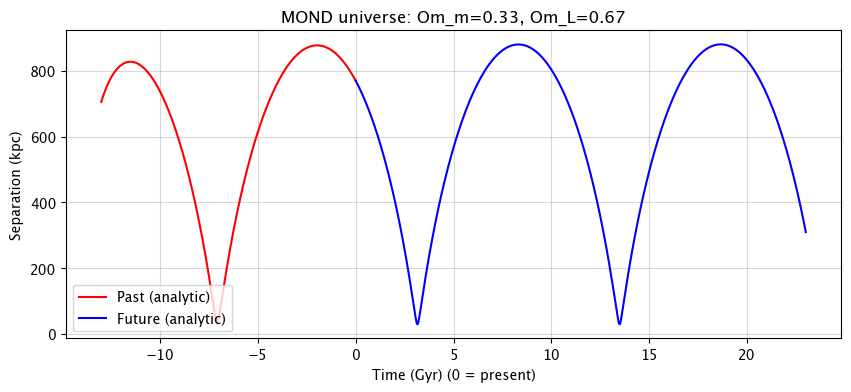

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from astropy.constants import G

# Unit conversions
kpc_to_m = 3.085677581e19        # 1 kpc in meters
kmps_to_mps = 1000              # km/s to m/s
Msun_to_kg = 1.98847e30         # solar mass in kg
yr_to_s = 365.25 * 24 * 3600     # 1 year in seconds

# Constants and conversions
G_val = 6.67430e-11  # m^3 kg^-1 s^-2
G_val = G_val / (kpc_to_m)**3 * (yr_to_s*1e6)**2  # kpc^3 kg^-1 Myr^-2
a0 = 1.2e-10  # m/s^2
a0 = a0 / kpc_to_m * (yr_to_s*1e6)**2  # kpc Myr^-2

# Physical parameters
m1 = 0.7e11 * Msun_to_kg      # kg
m2 = 1.6e11 * Msun_to_kg      # kg
# Q_val = 1.0                     # assume Q ~ 1 for now
q1 = m1/(m1+m2)  
q2 = 1 - q1  
Q = 2*(1-q1**1.5-q2**1.5)/(3*q1*q2)
vconv = 1.022e-3 # multiply by vconv to convert velocity from km/s to kpc/Myr

## Define function 

def K(t, om_m=1/3): # t = 0 at Big Bang
    H0 = 1/14e3 # in Myr^-1
    om_lambda = 1 - om_m
    return H0**2 * om_lambda - 2/9 * t **(-2)

# using most analytical formula for K
def K_true(t, om_m=1/3): # t = 0 at Big Bang
    H0 = 1/14e3
    om_lambda = 1 - om_m
    a_to_the_minus_3_t = (om_lambda/om_m) * (np.sinh(3/2*H0*np.sqrt(om_lambda)*t))**(-2)
    return H0**2 * (om_lambda - 1/2 * om_m * a_to_the_minus_3_t) 
    

#K = lambda t: (1./2. * (1/14e9)**2 * (4./3. - 1./3.*scalefac(t)**(-3))) # t=0 at Bigbang

def acceleration(t, rmag, K, m1, m2, F): # calculate acceleration scaler 
    acc = K * rmag - (m1 + m2) / m1 * F / m2
    return acc


def eofm(t, y, t0=14e3): 
    global b, om_m
    ''' This defines the second order ODE for MONDian infall
    t: time; 
    y: state vector [r1_x, r1_y, r1_z, r2.., v1.., v2..] 12 elements
    '''
    r1 = y[:3] # position 1
    r2 = y[3:6] # position 2
    v1 = y[6:9] # velocity 1
    v2 = y[9:] # velocity 2
    abs_r12 = np.linalg.norm(r2 - r1)  # distance
    rn = np.sqrt(abs_r12**2 + 2*b**2)   # softening scale
    ev = (r2 - r1) / abs_r12 # unit vector 
    tt = t0 + t
    y_term = (np.sqrt(G_val * (m1 + m2) * a0) / (rn * Q * a0))**2
    F = G_val * m1 * m2 / rn**2 * (1 + y_term**(-0.5))
    acce = acceleration(t, rn, K(tt, om_m=om_m), m1, m2, F) #relative acceleration = a2 - a1
    acc1 = -acce * ev * m2/(m1+m2) # acceleration of r1, follows m1a1 + m2a2 = 0
    acc2 = acce * ev * m1/(m1+m2)
    return np.concatenate((v1, v2, acc1, acc2))

def eofm_analytic(t, y, t0=14e3):
    global b, om_m
    ''' This defines the second order ODE for MONDian infall
    t: time; 
    y: state vector [r1_x, r1_y, r1_z, r2.., v1.., v2..] 12 elements
    '''
    r1 = y[:3] # position 1
    r2 = y[3:6] # position 2
    v1 = y[6:9] # velocity 1
    v2 = y[9:] # velocity 2
    abs_r12 = np.linalg.norm(r2 - r1)  # distance
    rn = np.sqrt(abs_r12**2 + 2*b**2)   # softening scale (see https://en.wikipedia.org/wiki/N-body_simulation)
    ev = (r2 - r1) / abs_r12 # unit vector 
    tt = t0 + t
    y_term = (np.sqrt(G_val * (m1 + m2) * a0) / (rn * Q * a0))**2
    F = G_val * m1 * m2 / rn**2 * (1 + y_term**(-0.5))
    acce = acceleration(t, rn, K_true(tt, om_m=om_m), m1, m2, F) #relative acceleration = a2 - a1
    acc1 = -acce * ev * m2/(m1+m2) # acceleration of r1, follows m1a1 + m2a2 = 0
    acc2 = acce * ev * m1/(m1+m2)
    return np.concatenate((v1, v2, acc1, acc2))
        
# Initial conditions in CoM: r = 770 kpc, v = 109 km/s, tangential = 17 km/s
r12 = 770
v12 = -109 # (M31 toward MW)
vt  = -17.0  
r1 = np.array([r12, 0., 0.]) * -q1 # MW position 
r2 = np.array([r12 , 0., 0.]) * q2 # M31 position in kpc
v1 = np.array([v12, vt, 0.]) * -q1 * vconv# MW velocity in kpc/Myr
v2 = np.array([v12, vt, 0.]) * q2 * vconv # M31 velocity: toward MW
y0 = np.concatenate((r1, r2, v1, v2)) 

# Time array from now (0) to 14 Gyr ago (negative direction, in seconds)
t_start = 0e3
t_end = -13e3
t_eval = np.linspace(t_start, t_end, 10000)

# set global parameters
om_m = 1/3
# Find softening scale b 
H0_SI = 70 / kpc_to_m # H0_kmps_per_Mpc = 70
rho_crit = (3 * H0_SI**2) / (8*np.pi*G.value)
L_box_m = np.cbrt(1/om_m * (m1+m2) * rho_crit**(-1))
L_box_kpc = L_box_m / kpc_to_m
b = 3*L_box_kpc/2**5
print('softening scale b that mimics the PySCo:', b, 'kpc')

# Solve the IVP
sol = solve_ivp(eofm_analytic, [t_start, t_end], y0, t_eval=t_eval, method='RK45', rtol=1e-6, # allow fractional error ~10e-6
    atol=1e-9, # this dominate when the solution is small, allow absolute error < 10e-9
    max_step=50.0) # never take a step longer than 50 Myr.
time_gyr = sol.t / 1e3
r1 = sol.y[0:3]
r2 = sol.y[3:6]
distance_kpc = np.linalg.norm(r2 - r1, axis=0)
print(f"Minimum separation in the past: {np.min(distance_kpc):.2f} kpc at time {time_gyr[np.argmin(distance_kpc)]:.2f} Gyr ago")


# Plotting the past
fig = plt.figure(figsize=(10, 4))
plt.plot(time_gyr, distance_kpc, color='red', lw=1.5, label='Past (analytic)')


"""
sol = solve_ivp(eofm, [t_start, t_end], y0, t_eval=t_eval, method='RK45', rtol=1e-6, # allow fractional error ~10e-6
    atol=1e-9, # this dominate when the solution is small, allow absolute error < 10e-9
    max_step=50.0) # never take a step longer than 50 Myr.
time_gyr = sol.t / 1e3
r1 = sol.y[0:3]
r2 = sol.y[3:6]
distance_kpc = np.linalg.norm(r2 - r1, axis=0)
print(f"Minimum separation in the past: {np.min(distance_kpc):.2f} kpc at time {time_gyr[np.argmin(distance_kpc)]:.2f} Gyr ago")
plt.plot(time_gyr, distance_kpc, '--',color='red', lw=1.5, label='Past')
"""



# Plotting the future
t_start = 0e3
t_end = 23e3
t_eval = np.linspace(t_start, t_end, 1000)
sol = solve_ivp(eofm_analytic, [t_start, t_end], y0, t_eval=t_eval, method='RK45', rtol=1e-6,
        atol=1e-9,
        max_step=50.0)
time_gyr = sol.t / 1e3
distance_kpc = np.linalg.norm(sol.y[3:6] - sol.y[0:3], axis=0)
print(f'flyby in the future: {np.min(distance_kpc):.2f}')
plt.plot(time_gyr, distance_kpc, color='blue', lw=1.5, label='Future (analytic)')


"""t_start = 0e3
t_end = 23e3
t_eval = np.linspace(t_start, t_end, 1000)
sol = solve_ivp(eofm, [t_start, t_end], y0, t_eval=t_eval, method='RK45', rtol=1e-6,
        atol=1e-9,
        max_step=50.0)
time_gyr = sol.t / 1e3
distance_kpc = np.linalg.norm(sol.y[3:6] - sol.y[0:3], axis=0)
print(f'flyby in the future: {np.min(distance_kpc):.2f}')
plt.plot(time_gyr, distance_kpc, '--', color='blue', lw=1.5, label='Future')
"""

plt.xlabel("Time (Gyr) (0 = present)")
plt.ylabel("Separation (kpc)")
plt.title(f"MOND universe: Om_m={om_m:.2f}, Om_L={1-om_m:.2f}")
plt.grid(True, alpha=0.5)
plt.legend(loc=3)
#plt.savefig('integration_trajectory_exact.png', dpi=300)
plt.show()



In [ ]:
# check for the use of b 

def acc_2body(r, b):
    from astropy.constants import G
    return G.value * M * r / (2*b**2 + r**2)**(3/2)


def R(acc_2body, r):
    '''ratio of newtonian acceleration between background cosmology and a 2body system with separation of r (physical unit).
    '''
    acc_cosmos = 2*r / (9*t*t)
    return acc_2body / acc_cosmos



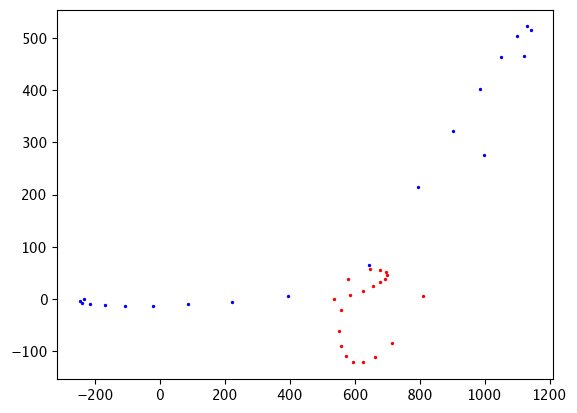

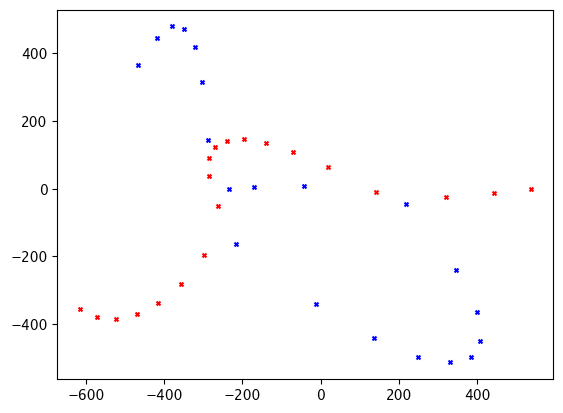

In [60]:
# set global parameters
b = 1
om_m = 1/3
t_start = 0e3
t_end = -13e3
t_eval = np.linspace(t_start, t_end, 20)
# Solve the IVP
sol = solve_ivp(eofm, [t_start, t_end], y0, t_eval=t_eval, method='RK45', rtol=1e-6, # allow fractional error ~10e-6
    atol=1e-9, # this dominate when the solution is small, allow absolute error < 10e-9
    max_step=50.0) # never take a step longer than 50 Myr.
time_gyr = sol.t / 1e3
r1 = sol.y[0:3]
r2 = sol.y[3:6]

plt.scatter(r1[0],r1[1],color='blue', s=2)
plt.scatter(r2[0], r2[1], color='red', s=2)
plt.show()

t_start = 0e3
t_end = 20e3
t_eval = np.linspace(t_start, t_end, 20)
sol = solve_ivp(eofm, [t_start, t_end], y0, t_eval=t_eval, method='RK45', rtol=1e-6,
    atol=1e-9,
    max_step=50.0)
r1 = sol.y[0:3]
r2 = sol.y[3:6]

plt.scatter(r1[0],r1[1], marker = 'x', color = 'blue', s=8)
plt.scatter(r2[0], r2[1],  marker = 'x', color = 'red', s=8)

$x_* = \frac{100,a,L_{\rm box}}{H_0}$

$\nabla^2 \tilde\phi = \frac{3}{2}a,\Omega_m (\tilde{\rho}-1)$

$N_{\rm part}$

$\Omega_m \rho_c$ 

In [20]:
2/3*np.sqrt(2/3)

np.float64(0.5443310539518174)

start


/var/folders/p_/547j2lgx16v73ndqdj0rb9t00000gn/T/ipykernel_65907/1279505489.py:126: RuntimeWarning: invalid value encountered in sqrt
  return a/14e3*sqrt(2./3.+1./3.*a**-3)


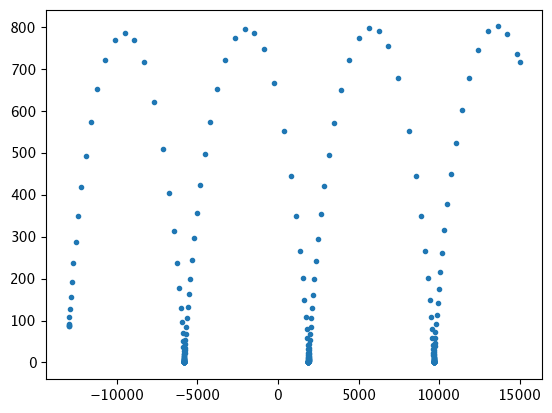

np.float64(5.3608995650708295e-05)

In [266]:
'''
Michal's numerical integration on Eq.(2) in the paper: https://arxiv.org/pdf/1306.6628 
'''

from numpy import *
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import *
from scipy.interpolate  import PchipInterpolator

def MOND_nu(l):
     #return 1./(1-exp(-sqrt(l))) # McGaugh
     return (1.+sqrt(1.+4./l))/2. #simple

def MOND_J(an):
     #converts newtonian to MONDian acceleration
     sig = sign(an)
     l = absolute(an)/a0
     return an*MOND_nu(l)


def arange_2gal(m1, m2, sep, vr, vt):
     x2 = m1/(m1+m2)*sep
     x1 = -m2/(m1+m2)*sep
     vr2 = m1/(m1+m2)*vr # radial velocity positive -> receding
     vr1 = -m2/(m1+m2)*vr
     vt2 = m1/(m1+m2)*vt
     vt1 = -m2/(m1+m2)*vt
     xv2 = array([x2,0,0,  vr2,vt2,0])
     xv1 = array([x1,0,0,  vr1,vt1,0])
     return xv1, xv2

def MOND_2B_acc(r,mp,ma, gext = 0, b = 0):
     rn = sqrt(r**2. + 2.*b**2.)
     qp = mp/(mp+ma)
     qa = 1.-qp
     Q = 2.*(1.-qp**(3./2.)-qa**(3./2.))/(3.*qp*qa)
     y = (sqrt(G*(mp+ma)*a0)/(rn*Q*a0))**2.
     #forc =  G*mp*ma/r**2.*(1.+y**(-1./2.))
     alp = 1
     Gt = G*(1+(y+(gext/a0)**2)**-alp)**(1/(2*alp))
     return Gt*ma/rn**2

def get_vcirc(sep, m1,m2):
     vcirc1 =  sqrt(abs(MOND_2B_acc(sep,m1,m2))*sep*m2/(m1+m2))
     vcirc2 =  sqrt(abs(MOND_2B_acc(sep,m2,m1))*sep*m1/(m1+m2))
     vcirc =  vcirc1+vcirc2
     return vcirc

def accn(rp,ra,mp, ma,t, gext=0): #mutual acceleration pointing in from active to passive galaxy
     global  G, a0, b, cosmoexp
     rmag = linalg.norm(ra-rp)
     ev = (rp-ra)/rmag
     rn = sqrt(rmag**2. + 2.*b**2.)
     qp = mp/(mp+ma)
     qa = 1.-qp
     Q = 2.*(1.-qp**(3./2.)-qa**(3./2.))/(3.*qp*qa)
     y = (sqrt(G*(mp+ma)*a0)/(rn*Q*a0))**2.
     #forc =  G*mp*ma/r**2.*(1.+y**(-1./2.))
     alp = 1
     Gt = G*(1+(y+(gext/a0)**2)**-alp)**(1/(2*alp))
     f = Gt*mp*ma/rn**2

     if cosmoexp:
         tuniv = 14e3+t #time since big bang, t in Myr
         K = 2.0/(3.0*(14e3)**2) - 2.0/(9.0*tuniv**2) # term cosmo constant plus matter, neglect radiation and curvature
     else:
         K = 0.0

     #accgaln = K*rmag-f/mp # acceleration original used by me in the past
     accgaln = K*rmag-(ma+mp)/(ma*mp)*f # mutual acceleration followingZhao+13

    ## if virgotides:
    ## accgaln = accgaln+2*G*12e10/500**3*rmag

     #accgaln = K*rn-f/mp #gives the same result as Zhao et al.(2013)
     #print(tuniv, K*r/(f/mp))

     return ev*accgaln




def solveode(fun, t0, tend, y0):
     #solve ode adaptive timestep
     backend = 'dopri5'
     #backend = 'dop853'
     solver = ode(fun).set_integrator(backend, nsteps = 10000)

     sol = []
     def solout(t, y):
         sol.append([t, *y])
     solver.set_solout(solout)
     #print(y0, t0, tend)
     solver.set_initial_value(y0, t0)
     solver.integrate(tend)

     sol = array(sol)
     return sol






print('start')

vconv = 1.022e-3 # multiply by vconv to convert velocity from km/s to kpc/Myr
G = 0.06731*6.67e-11 # gravitational constant
a0 = 3.61e-3 # MOND acceleration constant = 1.2 m/s^2





m1 = 3e11 #(225*vconv)**4/(G*a0)
m2 = 1e9 #(180*vconv)**4/(G*a0)


gext = 0.03*a0 # global external field
cosmoexp =  True

## solve scale factor as function of cosmic time

def rhs(t,a):
     return a/14e3*sqrt(2./3.+1./3.*a**-3)
     


sol = solveode(rhs, 0, -14e3, 1 )
plt.plot(sol[:,0], sol[:,1]) # plot scale factor as function of time
plt.xlabel('time [Myr]')
plt.ylabel('scale factor')
plt.title('Cosmological scale factor')
plt.grid()
plt.close()
scalefac = PchipInterpolator(sol[::-1,0], sol[::-1,1], extrapolate = False)



H = lambda t: scalefac.derivative()(t)/scalefac(t)



def eqmo(t,y):
     r1 = y[:3] # position 1
     r2 = y[3:6] # position 2
     v1 = y[6:9] # velocity 1
     v2 = y[9:] # velocity 2
     accrel = accn(r2,r1,m2, m1,t)
     acc2 = accrel*m1/(m1+m2)
     acc1 = -accrel*m2/(m1+m2)
     return concatenate((v1, v2, acc1, acc2))

t0 = -13e3
r12 = array([88,0,0])
v12 = H(t0)*r12+array([0,0,0])*vconv

b=1
sol = solveode(eqmo, t0, 15e3, concatenate(( -m2/(m1+m2)*r12,
m1/(m1+m2)*r12,  -m2/(m1+m2)*v12, m1/(m1+m2)*v12  )) )
t = sol[:,0]
r1 = sol[:,1:4]
r2 = sol[:,4:7]
v1 = sol[:,7:10]
v2 = sol[:,10:]
d = linalg.norm(r1-r2,axis = 1)
v = linalg.norm(v1-v2,axis = 1)

plt.plot(t,d,'.')
plt.show()
np.min(d)